In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 

*The following import is needed if the file is being run from a Google Colab*

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# *Project Introduction: Beautiful Data for the Beautiful Game* 


<br/>
<img src="https://miro.medium.com/max/696/1*2Myo-KPiR9taWBIdFaXqqQ.jpeg"/>

There has been a data revolution in the world of the 'beautiful game', or football, in recent decades. Football teams have spent millions on data-driven approaches to training and purchasing players. With the richness of the data coming from each game, its no wonder. For this project, let's take our own shot at this.

<br/>

## How football is played ~for those who live under a rock~

Football is a simple game where two teams of 11 players each have to put a single ball within two desginated areas to score "goals" without using their hands within 90 minutes. The match could be a win, loss or draw for a team depending on the difference in the number of goals scored for each team.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRSYMMN-VS0uxaWQzjUqBpizmVpaZfjvnKm8w&usqp=CAU" alt="Goalkeeper diving"/>

<br/>

## The Premier League

<img src="https://resources.premierleague.com/photos/2020/07/29/a1313bf7-f485-47e1-8bad-b764b64145e9/Jordan-Henderson-trophy-lift.jpg?width=930&height=620"/>

<br/>

The Premier League is an annual football competition where 20 of the best teams in England play each other in a dual round-robin format, running from August to May. At 3.2 billion unique viewers in its 19/20 season, it is the biggest annual compeition in the world

In a dual round-robin format, each team plays with the other team twice, meaning each (of the 20 teams) play 19 different teams per season once home and once away for a total of 38 games per season. This means that there are a total of 380 games played per season.

Throughout the game, various statistics of the game are collected. The following is an image of one such collection of statistics. 
The relevant statistics will be explained later in the notebook.

<br/>

<img src="https://pbs.twimg.com/media/Byj3ZSWIYAA-3Rb.png:large"/>

<br/>


With all that said, let's get into the data analysis!




# Data Preparation

For our data, we will be collecting from two sources, and combining them for a single dataset.

The first is a dataset of the English Premier League collected by Tara Nguyen in Kaggle from 2010 to 2018. This data set is a match-by-match statistical report (similar to above) of every season from 2010/11 to 2017/2018. As explained, there are 380 matches * 8 seasons = 3040 matches (or rows) in our dataset.

As Nguyen's data set lacked cetain match data that are important to our project, we created another dataset through web scraping from the official Premier League website (www.premierleague.com) and appended the data to the current dataset.

First, lets import Tara Nguyen's dataset

In [3]:

all_seasons_data = pd.read_csv("https://raw.githubusercontent.com/tara-nguyen/english-premier-league-datasets-for-10-seasons/main/epldat10seasons/epl-allseasons-matchstats.csv")
# Exclude the 2018/19 and 2019/20 seasons
values = ['2018/19', '2019/20']
all_seasons_data = all_seasons_data[all_seasons_data.Season.isin(values) == False]
all_seasons_data

,Season,Date,Referee,HomeTeam,AwayTeam,FullTime,Halftime,HomeGoals,HomeGoalsHalftime,HomeShots,...,HomeYellowCards,HomeRedCards,AwayGoals,AwayGoalsHalftime,AwayShots,AwayShotsOnTarget,AwayCorners,AwayFouls,AwayYellowCards,AwayRedCards
0,2010/11,2010-08-14,M Dean,Aston Villa,West Ham,HomeWin,HomeWin,3,2,23,...,1,0,0,0,12,2,7,15,2,0
1,2010/11,2010-08-14,P Dowd,Blackburn,Everton,HomeWin,HomeWin,1,1,7,...,2,0,0,0,17,12,3,14,1,0
2,2010/11,2010-08-14,S Attwell,Bolton,Fulham,Draw,Draw,0,0,13,...,1,0,0,0,12,7,8,13,3,0
3,2010/11,2010-08-14,M Clattenburg,Chelsea,West Brom,HomeWin,HomeWin,6,2,18,...,1,0,0,0,10,4,1,10,0,0
4,2010/11,2010-08-14,A Taylor,Sunderland,Birmingham,Draw,HomeWin,2,1,6,...,3,1,2,0,13,7,6,10,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,2017/18,2018-05-13,M Atkinson,Newcastle,Chelsea,HomeWin,HomeWin,3,1,16,...,0,0,0,0,6,2,2,10,1,0
3036,2017/18,2018-05-13,A Marriner,Southampton,Man City,AwayWin,Draw,0,0,8,...,3,0,1,0,13,2,12,10,1,0
3037,2017/18,2018-05-13,A Taylor,Swansea,Stoke,AwayWin,AwayWin,1,1,26,...,1,0,2,2,8,5,0,9,2,0
3038,2017/18,2018-05-13,C Pawson,Tottenham,Leicester,HomeWin,AwayWin,5,1,14,...,1,0,4,2,16,9,4,13,2,0


### Web scraping

Python Selenium is a web scraping library that allows us to launch to automate web browsing

We used this bot to go to https://www.premierleague.com/ to attain the match data for each match. 

Essentially, each match's data is put into a single URL, where https://www.premierleague.com/match/{match_number} contains the data for the {match_number}th match, where match_number is a unique identifier for each match (see code below) 

All of the code that is used to scrape the data is in the cell below. The website data is converted to text and will create a PLData{season_number}.csv on the same directory as this .ipynb file. 

### **Do take note that the cell below will not run unless this machine has Chrome Webdriver and Selenium installed. If you wish to test this code, it is suggested that you run this code in your local machine's runtime enviroment, rather than in this Jupyter Notebook server. Remove the first line when ready to scrape.**

In [4]:
"""
FULL SCRAPER CODE
"""

errorcode = """
Please ensure that all relevant libraries, chrome webdriver and selenium is installed. 
It is suggested to run this code in your local machine, using a Python virtual environment. 
Remove this code once done
"""
raise ImportError(errorcode)

import csv
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait, Select
from selenium.webdriver.support import expected_conditions
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException, NoSuchElementException

# These are the match numbers for the FIRST match of every season, to be put into the URL! Note: This identifier may change, subject to the Premier League website's descretion.
SEASON_FIRST_MATCHES = {
    '1011': 7087,
    '1112': 7467,
    '1213': 7864,
    '1314': 9231,
    '1415': 9611,
    '1516': 12115,
    '1617': 14042,
    '1718': 22342
}

driver = webdriver.Chrome(ChromeDriverManager().install())

# First we open up the very first 10/11 premier league match
url = "https://www.premierleague.com/match/7087"
driver.get(url)

# Accept the cookies
cookie_css_class = "js-accept-all-close"  # From inspecting element


def wait_till_element_appears(by, selector_value, clickable=True, time=2):
    try:
        if clickable:
            WebDriverWait(driver, time).until(
                expected_conditions.element_to_be_clickable(
                    (by, selector_value))
            )
        else:
            WebDriverWait(driver, time).until(
                expected_conditions.presence_of_element_located(
                    (by, selector_value))
            )
    except TimeoutException:
        print("request timed out. Try again")
    except:
        print("Something went wrong. Check the code again")


# Just wait until the cookies button shows up
wait_till_element_appears(By.CLASS_NAME, cookie_css_class, time=4)

# first, grab the button
cookie_button = driver.find_element_by_class_name(cookie_css_class)

# click on the button
cookie_button.click()

# For every season in the hash table,
for season in SEASON_FIRST_MATCHES:

    # create the csv file, naming it the season that we want
    with open(f'PLdata{season}.csv', 'w', newline='') as csvfile:
        csvwriter = csv.writer(csvfile, dialect='excel')

        # Add the column names
        column_names = [
            'Season',
            'HomeTeam',
            'AwayTeam',
            'HomePossession',
            'AwayPossession',
            'HomeTouches',
            'AwayTouches',
            'HomePasses',
            'AwayPasses',
            'HomeTackles',
            'AwayTackles',
            'HomeClearances',
            'AwayClearances',
            'HomeOffsides',
            'AwayOffsides'
        ]
        csvwriter.writerow(column_names)

        try:
            # Now, for every match number
            for match_number in range(SEASON_FIRST_MATCHES[season], SEASON_FIRST_MATCHES[season]+380):

                # open the webpage dedicated to that match
                url = f'https://www.premierleague.com/match/{match_number}'
                driver.get(url)

                # This is the stats button XPATH
                stats_button_xpath = "//li[@data-tab-index='2']"

                # wait for the stats button to appear
                wait_till_element_appears(By.XPATH, stats_button_xpath, time=4)

                # click on the stats button
                try:
                    stats_button = driver.find_element_by_xpath(stats_button_xpath)
                    stats_button.click()
                except NoSuchElementException:
                    print(
                        "The element you were looking for could not be found. Check your XPATH")

                # Extract the data by getting the table rows
                wait_till_element_appears(
                    By.TAG_NAME, selector_value="table", clickable=False)
                time.sleep(1) 
                table_rows = driver.find_elements_by_xpath(
                    "//th/a") + driver.find_elements_by_xpath("//td/p")

                # Write into our csv file
                csv_row = [
                    '20' + season[:2] + '/' + season[2:],  # season
                    table_rows[2].text,  # home team
                    table_rows[3].text,  # away team
                    table_rows[4].text,  # home possession
                    table_rows[6].text,  # Away possession
                    table_rows[13].text,  # Home touches
                    table_rows[15].text,  # away touches
                    table_rows[16].text,  # Home passes
                    table_rows[18].text,  # Away passes
                    table_rows[19].text,  # Home tackles
                    table_rows[21].text,  # away tackles
                    table_rows[22].text,  # home clearances
                    table_rows[24].text,  # Away clearances
                    table_rows[28].text,  # Home offsides
                    table_rows[30].text,  # Away offsides
                ]
                csvwriter.writerow(csv_row)

        except TimeoutException:
            print("There was a time out")

driver.quit()


ImportError: ignored

### Translating the data to a single Dataframe 

The above scraper code will organise each .csv file according to season data. Thus, we import these csv files, and combine them with Nguyen's data to obtain the final, full dataset.
**Please ensure that the csv files are available in this notebook's directory before running the below code. If not, import all the cleaned data from final_data.csv in the cell below this one, called "the final dataset"** 

In [ ]:
season1011 = pd.read_csv('PLdata1011.csv')
season1112 = pd.read_csv('PLdata1112.csv')
season1213 = pd.read_csv('PLdata1213.csv')
season1314 = pd.read_csv('PLdata1314.csv')
season1415 = pd.read_csv('PLdata1415.csv')
season1516 = pd.read_csv('PLdata1516.csv')
season1617 = pd.read_csv('PLdata1617.csv')
season1718 = pd.read_csv('PLdata1718.csv')

result = pd.concat([season1011, season1112, season1213, season1314, season1415, season1516, season1617, season1718], ignore_index=True)
final_data = pd.merge(left = result, right = all_seasons_data, left_index = True, right_index = True).drop(columns = ['HomeTeam_y', 'AwayTeam_y', 'Season_y'])


### The final dataset

Note that as the above data has already been scraped and mined into final_data.csv, for the rest of this project we will use this csv file for our data. The above code is a blueprint for how we did it. 

In [5]:
final_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/final_data.csv")
final_data.drop(labels="Unnamed: 0", axis="columns", inplace=True)
final_data

,Season_x,HomeTeam_x,AwayTeam_x,HomePossession,AwayPossession,HomeTouches,AwayTouches,HomePasses,AwayPasses,HomeTackles,...,HomeYellowCards,HomeRedCards,AwayGoals,AwayGoalsHalftime,AwayShots,AwayShotsOnTarget,AwayCorners,AwayFouls,AwayYellowCards,AwayRedCards
0,2010/11,Aston Villa,West Ham United,56.8,43.2,636,529,395,313,27,...,1,0,0,0,12,2,7,15,2,0
1,2010/11,Blackburn Rovers,Everton,30.4,69.6,450,729,208,469,15,...,2,0,0,0,17,12,3,14,1,0
2,2010/11,Bolton Wanderers,Fulham,46.5,53.5,592,636,336,394,26,...,1,0,0,0,12,7,8,13,3,0
3,2010/11,Chelsea,West Bromwich Albion,59.5,40.5,782,571,592,394,16,...,1,0,0,0,10,4,1,10,0,0
4,2010/11,Sunderland,Birmingham City,44.1,55.9,514,581,304,386,9,...,3,1,2,0,13,7,6,10,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,2017/18,Newcastle United,Chelsea,41.9,58.1,585,764,406,569,19,...,0,0,0,0,6,2,2,10,1,0
3036,2017/18,Southampton,Manchester City,30.3,69.7,441,782,259,583,24,...,3,0,1,0,13,2,12,10,1,0
3037,2017/18,Swansea City,Stoke City,57.6,42.4,744,612,544,414,16,...,1,0,2,2,8,5,0,9,2,0
3038,2017/18,Tottenham Hotspur,Leicester City,64.0,36.0,672,453,480,265,20,...,1,0,4,2,16,9,4,13,2,0


# Problem formulation 1

### **Problem 1 and 2: Predicting goals scored and the feature importance of what predicts goals scored**

The most classic problem in football is to maximise the number of goals scored per match.

Thus, for this project, we start out with **two problems:**


1.  Predict the **number of goals scored** (response) based on the other relevant data available such as possession, shots, etc (predictors).
2. We hope to recommend to teams certain varibles that they can maximise in order to score more goals **(feature importance)**. 

For example, if we find that possession is the most important to predicting the number of goals scored, then we would recommend that teams play in a high-possession style of play.

So let's do some exploratory analysis on the data first!

# Exploratory Data Analysis



### The following are basic information regarding the columns  

In [6]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Season_x           3040 non-null   object 
 1   HomeTeam_x         3040 non-null   object 
 2   AwayTeam_x         3040 non-null   object 
 3   HomePossession     3040 non-null   float64
 4   AwayPossession     3040 non-null   float64
 5   HomeTouches        3040 non-null   int64  
 6   AwayTouches        3040 non-null   int64  
 7   HomePasses         3040 non-null   int64  
 8   AwayPasses         3040 non-null   int64  
 9   HomeTackles        3040 non-null   int64  
 10  AwayTackles        3040 non-null   int64  
 11  HomeClearances     3040 non-null   int64  
 12  AwayClearances     3040 non-null   int64  
 13  HomeOffsides       3040 non-null   int64  
 14  AwayOffsides       3040 non-null   int64  
 15  Date               3040 non-null   object 
 16  Referee            3040 

### So, what do these variables mean?

<h3>**Variable**</h3> | <h3>**Meaning**</h3>
--- | ---
<h4>Season, Referee, Date, Home/AwayTeam</h4> | <h4>Self-explanatory!</h4>
<h4>Fulltime, Halftime</h4> | <h4>Which team is winning at half or fulltime</h4>
<h4>Any of the below variable that starts with "Home"</h4> | <h4>Statistic pertains to the home team</h4>
<h4>Any of the below variable that starts with "Away"</h4> | <h4>Statistic pertains to away team</h4>
<h4>Possession</h4> | <h4>The percentage of time in the game the ball was held by a team</h4>
<h4>Touches</h4> | <h4>Number of times a team touched the ball</h4>
<h4>Passes, RedCards, YellowCards, Fouls, Goals, Corners</h4> | <h4>Self-explanatory!</h4>
<h4>Tackles</h4> | <h4>Number of times a defender "tackles" the ball off the attacker</h4>
<h4>Clearances</h4> | <h4>Number of times a team shot the ball hard to get it away from their goal</h4>
<h4>Offsides</h4> | <h4>Number of times a pass was played to a man who was behind the opposing defensive line </h4>
<h4>GoalsHalftime</h4> | <h4>Number of goals scored before halftime</h4>
<h4>Shots</h4> | <h4>Number of times the ball was hit hard with the intention of scoring a goal</h4>
<h4>ShotsOnTarget</h4> | <h4>Number of times a shot is aimed correctly i.e. would be a goal if not stopped by a defender or goalkeeper</h4>











## Cleaning the data for the most relevant variables for the data

Notice how there are a lot of data above that is not relevant to predicting number of goals scored. 

This data includes game meta-data such as referee name and date of the match, and also the information such as the corners, cards and fouls which are considered *incidental* (meaning, the teams playing the match are not actively incorporating maximising/minimising these variables into their playstyles. Every team wants to minimise cards and maximise corners, because they are clealy optimal)

A data-driven recommendation to maximise/minimise any of these variables would not make sense (e.g., play the game with certain referees, or make sure we minimise red cards) 

Thus, let's only include the data that is a playstyle choice for a team, and is relevant to controlling the number of goals in a match

Let's also limit our analysis to the **home team** for easier exploration of the data by eye, and see what we discover

In [7]:
#Extracting variables that could affect home goals
HomeData = pd.DataFrame(final_data[["HomePossession", "HomeTouches", "HomePasses", "HomeTackles", "HomeClearances", "HomeOffsides", "HomeShots", "HomeShotsOnTarget", "HomeGoals"]])
HomeData

,HomePossession,HomeTouches,HomePasses,HomeTackles,HomeClearances,HomeOffsides,HomeShots,HomeShotsOnTarget,HomeGoals
0,56.8,636,395,27,24,1,23,11,3
1,30.4,450,208,15,48,3,7,2,1
2,46.5,592,336,26,54,5,13,9,0
3,59.5,782,592,16,10,3,18,13,6
4,44.1,514,304,9,49,2,6,2,2
...,...,...,...,...,...,...,...,...,...
3035,41.9,585,406,19,10,0,16,6,3
3036,30.3,441,259,24,30,4,8,3,0
3037,57.6,744,544,16,4,1,26,11,1
3038,64.0,672,480,20,17,2,14,6,5


In [8]:
HomeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HomePossession     3040 non-null   float64
 1   HomeTouches        3040 non-null   int64  
 2   HomePasses         3040 non-null   int64  
 3   HomeTackles        3040 non-null   int64  
 4   HomeClearances     3040 non-null   int64  
 5   HomeOffsides       3040 non-null   int64  
 6   HomeShots          3040 non-null   int64  
 7   HomeShotsOnTarget  3040 non-null   int64  
 8   HomeGoals          3040 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 213.9 KB


Interestingly, it seems that all our chosen variables are actually **numeric**. Goals may be classified as numeric or categorical - we will specify whether it's one or the other in our analysis below.

As our data is made up of univariate columns, lets use a box plot of all variables to have a quick look  

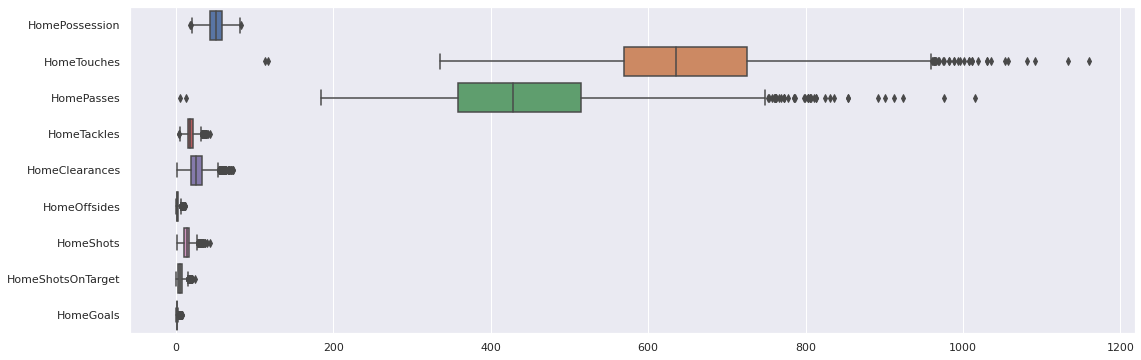

In [9]:
#Box plot of all the variables
f = plt.figure(figsize=(18, 6))
sb.boxplot(data = HomeData, orient = "h")


We can see that the median of HomeTouches and HomePasses are much greater than that of the other variables. Let's drop this in the plot below

If we were to zoom in to the other variables, we see that the median of each of these variables are far apart from each other. 

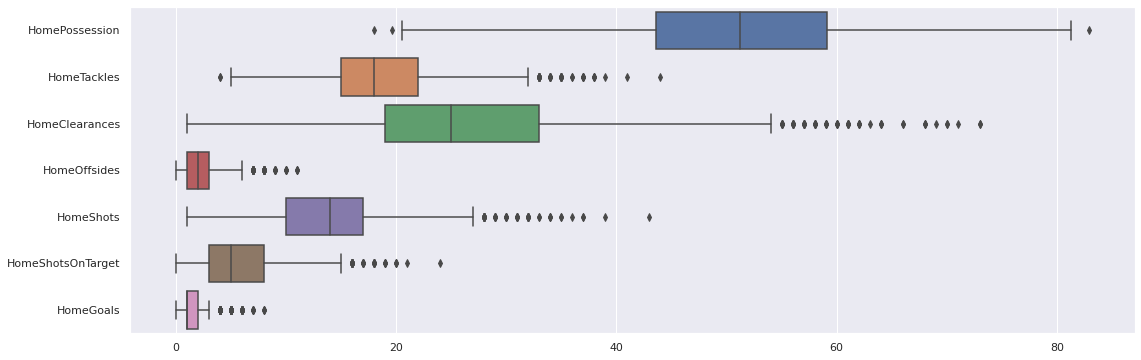

In [10]:
#Dropping HomeTouches and HomePasses
HomeData_new = HomeData.drop(columns = ['HomeTouches', 'HomePasses'])
f = plt.figure(figsize=(18, 6))
sb.boxplot(data = HomeData_new, orient = "h")


### Some clues to solving our problem

Finally, let's get some clues on how to solve our problem. First, we start with a correlation heatmap to see which variables are the most correlated with HomeGoals:

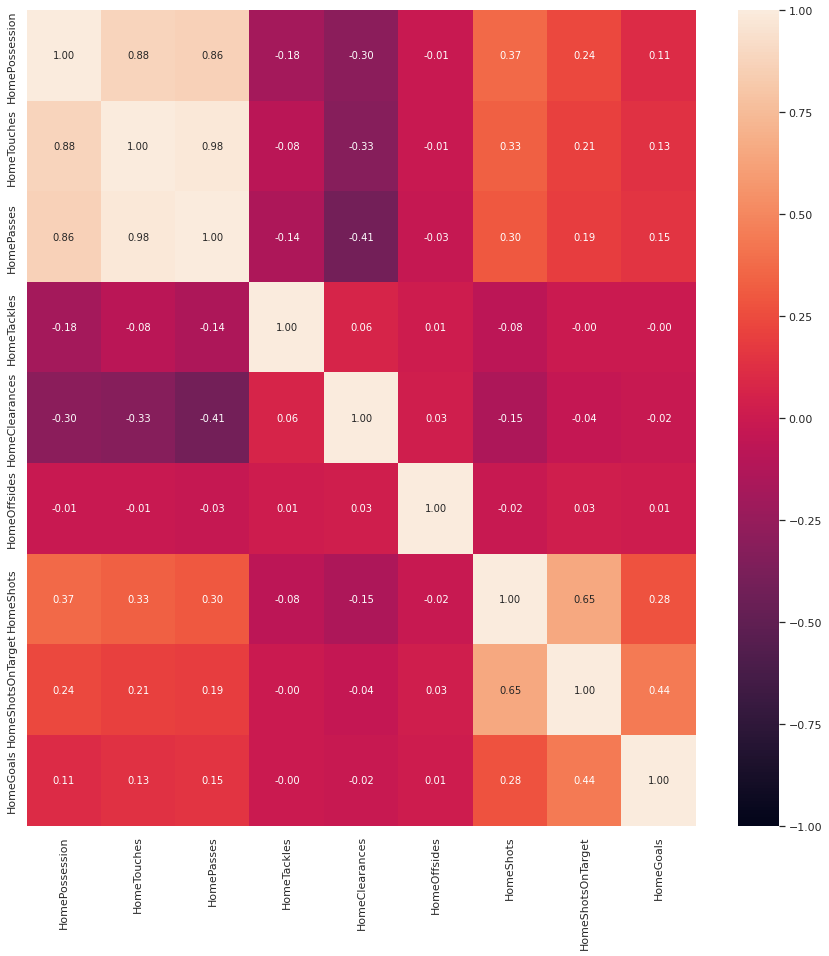

In [11]:
f, axes = plt.subplots(1, 1, figsize = (15,15))
sb.heatmap(HomeData.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

As one can see from the above heatmap, it appears that for HomeGoals, the HomeShots and HomeShotsOnTarget statistics are the most correlated - with 0.28 and 0.44 for the r<sup>2</sup> values respectively. 

It would make sense that, if you take more shots, you should score more goals. But is this really true? How much do shots matter over everything else? Let's use a couple of box plots to visualise this

,HomeShots,HomeGoals
HomeShots,1.000000,0.275334
HomeGoals,0.275334,1.000000


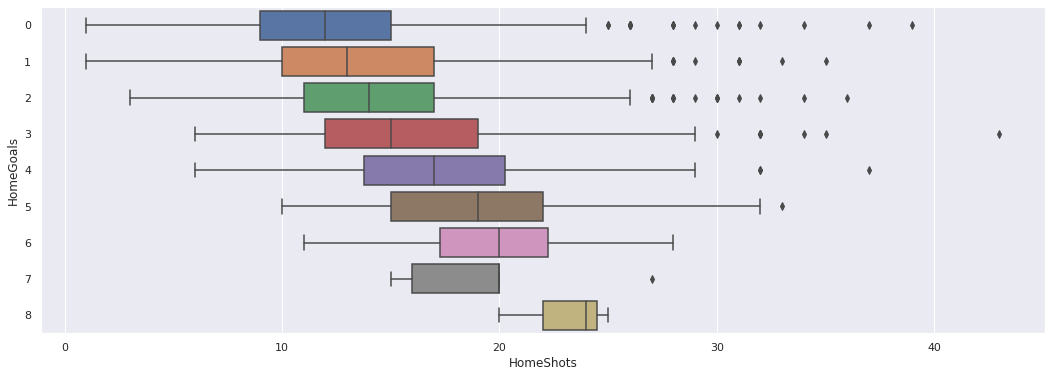

In [12]:
HomeGoals = final_data['HomeGoals']
HomeShots = final_data['HomeShots']
jointDF = pd.concat([HomeShots, HomeGoals], axis = 1)
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "HomeShots", y = "HomeGoals", data = jointDF, orient = "h")
jointDF.corr() 

We can clearly see that as the number of HomeShots increase, the number of HomeGoals also increase. This is in accordance with the correlation observed above.

,HomeShotsOnTarget,HomeGoals
HomeShotsOnTarget,1.00000,0.44286
HomeGoals,0.44286,1.00000


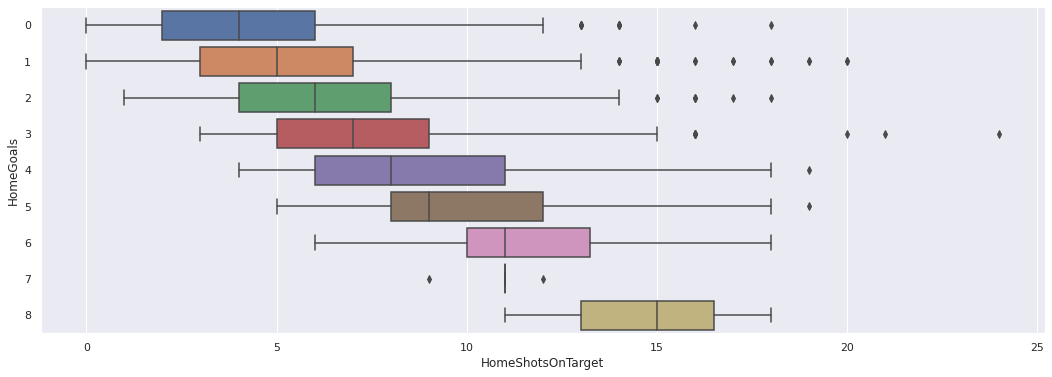

In [13]:
HomeShotsOnTarget = final_data['HomeShotsOnTarget']
jointDF2 = pd.concat([HomeShotsOnTarget, HomeGoals], axis = 1)
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "HomeShotsOnTarget", y = "HomeGoals", data = jointDF2, orient = "h")
jointDF2.corr()

Similarly, as HomeShotsOnTarget increases, based on the median of HomeGoals, then number of HomeGoals also increases

,HomePossession,HomeGoals
HomePossession,1.000000,0.105717
HomeGoals,0.105717,1.000000


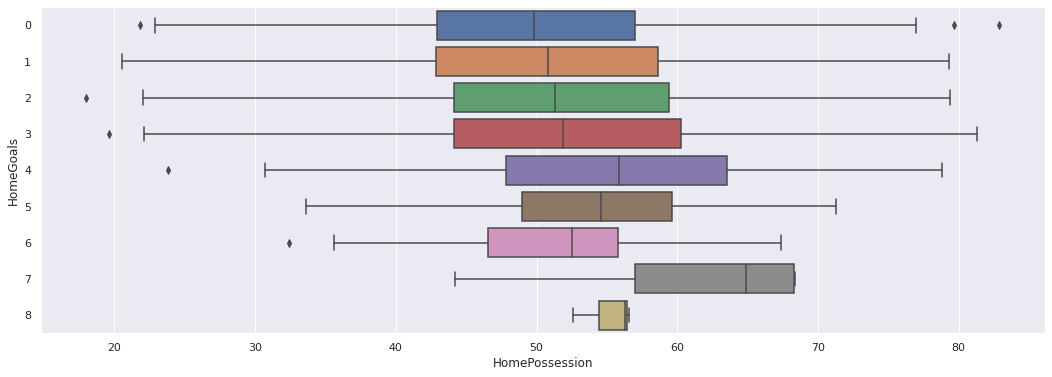

In [14]:
HomePossession = final_data['HomePossession']
jointDF3 = pd.concat([HomePossession, HomeGoals], axis = 1)
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "HomePossession", y = "HomeGoals", data = jointDF3, orient = "h")
jointDF3.corr()

In this case, the medians of each level of HomeGoals are about the same. Therefore there appears to be no correlation between HomePossession and HomeGoals.

Notice that the above are all numeric variables, so we can actually use a simple linear regression model in order to predict home goals. 

So let's try that then!

# Model 1: Simple Multivariate Linear Regression to predict goals

#### **Response: HomeGoals**
####  **Predictors: Every other column in the cleaned HomeData data. See predictors below.**

In [15]:
Model_1_predictors = HomeData.drop(columns="HomeGoals")
Model_1_response = HomeData["HomeGoals"]

Model_1_predictors

,HomePossession,HomeTouches,HomePasses,HomeTackles,HomeClearances,HomeOffsides,HomeShots,HomeShotsOnTarget
0,56.8,636,395,27,24,1,23,11
1,30.4,450,208,15,48,3,7,2
2,46.5,592,336,26,54,5,13,9
3,59.5,782,592,16,10,3,18,13
4,44.1,514,304,9,49,2,6,2
...,...,...,...,...,...,...,...,...
3035,41.9,585,406,19,10,0,16,6
3036,30.3,441,259,24,30,4,8,3
3037,57.6,744,544,16,4,1,26,11
3038,64.0,672,480,20,17,2,14,6


### Model Training

In [16]:
#Setting up the regresion problem with Train and Test datasets
#Change this to KFolds cross validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Model_1_predictors, Model_1_response, random_state = 40, test_size = 0.25)

from sklearn.linear_model import LinearRegression

#Don't think should use regression

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print()

for i,x in enumerate(["HomePossession", "HomeTouches", "HomePasses", "HomeTackles", "HomeClearances", "HomeOffsides", "HomeShots", "HomeShotsOnTarget"]):
  print('Coefficient of ' +x + ' (times 1000):\t: ', linreg.coef_[i]*1000)
print()

# Print the Coefficients against Predictors




Intercept of Regression 	: b =  1.6562849791701781

Coefficient of HomePossession (times 1000):	:  -14.692344924709069
Coefficient of HomeTouches (times 1000):	:  -9.648298296960684
Coefficient of HomePasses (times 1000):	:  11.717850497555034
Coefficient of HomeTackles (times 1000):	:  14.521979100089407
Coefficient of HomeClearances (times 1000):	:  11.741204486041056
Coefficient of HomeOffsides (times 1000):	:  15.137778678294772
Coefficient of HomeShots (times 1000):	:  5.822368316389428
Coefficient of HomeShotsOnTarget (times 1000):	:  175.72291998552026



(Each coefficient of regression is multiplied by 1000 in the above before it is printed in order to compare the coefficients more clearly)

### Model performance

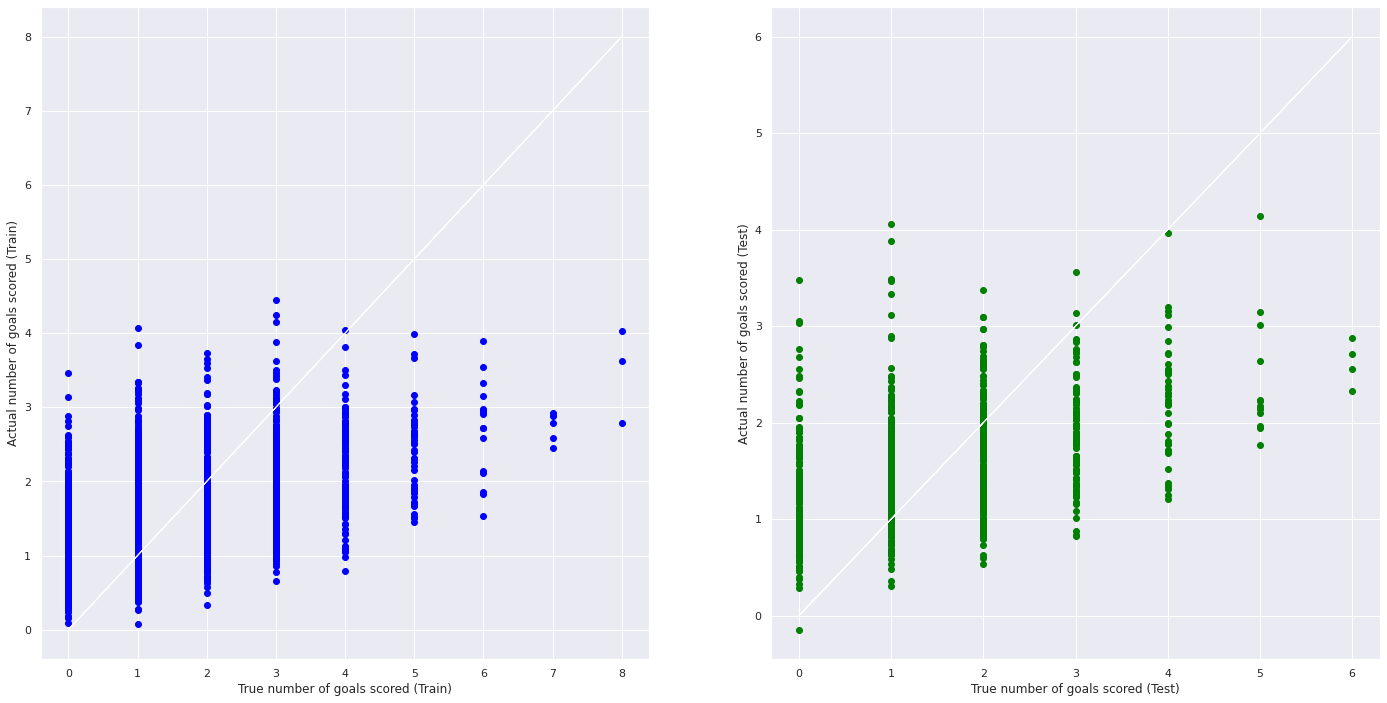

In [17]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True number of goals scored (Train)")
axes[0].set_ylabel("Actual number of goals scored (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True number of goals scored (Test)")
axes[1].set_ylabel("Actual number of goals scored (Test)")
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.24585267882156603
Mean Squared Error (MSE) 	: 1.3240264390971843

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.18300473277553309
Mean Squared Error (MSE) 	: 1.250544499136237



## **Insights**

**Goal Prediction:**

Rather surprisingly, our model did not do too well - the explained variance only had an R^2 value of around 0.18 for predicting goals from the above data. For this, maybe it will be more useful to try another model. Lets try *Model 2: Random Forest* next to find a better way to predict goals!

**Feature importance:**

As we can see from the above model, the variable with the highest coefficient is Shots On Target. So our recommendation to football teams is to take more shots, and make sure that they are on target.

Let's try our Random Forest model:

# Model 2: Random Forest

#### **Response: Same as Model 1**
#### **Predictors: Same as Model 1**

### Model Training



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,


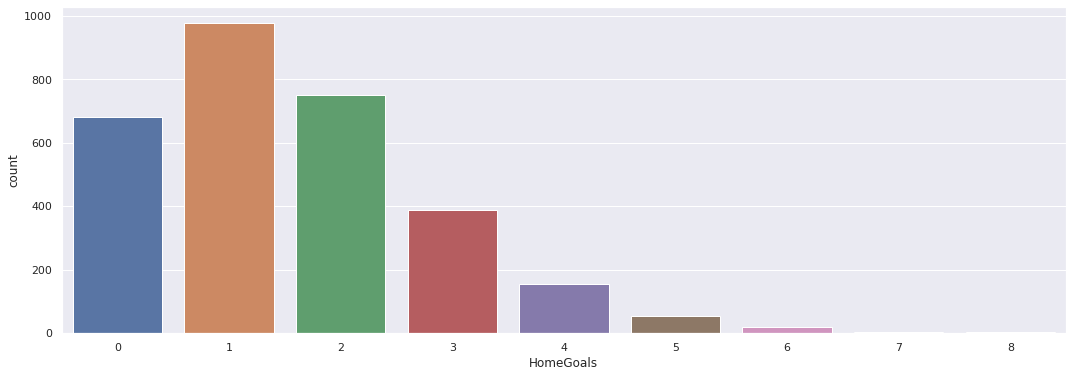

In [19]:
y = pd.DataFrame(HomeGoals.astype('category'))
f = plt.figure(figsize=(18, 6))
sb.countplot(y['HomeGoals'])

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV


predictors = ["HomePossession", "HomeTouches", "HomePasses", "HomeTackles", "HomeClearances", "HomeOffsides", "HomeShots", "HomeShotsOnTarget"]
X = pd.DataFrame(final_data[predictors])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.25)
rforest = GridSearchCV(RandomForestClassifier(max_depth = 4), {
  "n_estimators": [100, 200, 300],
},cv = 5) ##Can change the parameters here

rforest.fit(X_train, y_train.values.ravel()) 
df = pd.DataFrame(rforest.cv_results_)
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)



### Model Performance

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.4114035087719298

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.35789473684210527



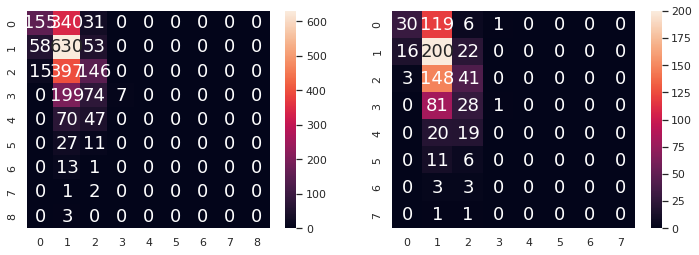

In [20]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

### Feature importance

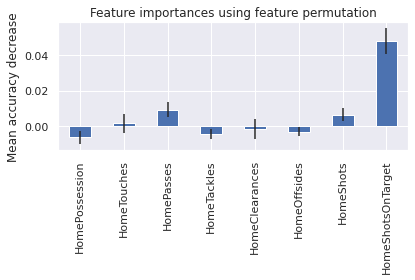

In [21]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rforest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=predictors)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using feature permutation")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()


## **Insights**

This model features much better performance than Linear Regression, with an R^2 value of 0.35, much higher than 0.18 for Model 1. Thus, for *Problem 1: Predicting Goals* we recommend using this random forest model in order to predict the number of goals socred in a match.

As for *Problem 2: Feature Importance*, we can see that, similiar to Model 1, the feature importance for HomeShotsOnTarget dwarfs all other variables.

# Problem Formulation 2

Our feature importance calculations from both models show that HomeShotsOnTarget is the most important feature for both. Well... that a bit obvious. If you take more shots (on target), you score more goals. 

We want to find insights that are more useful to football teams to win football matches (that is why we tried our feature importance approach).

Maybe there is some pattern in the data that we can't discern by eye?



### **Problem 3: Discovering team playstyles using clustering**

Maybe there is some style of play that certain teams play in that makes certain teams more successful? Or maybe there is some combination of actions (meaning, maximising certain variables and minimising others, beyond just taking more shots) that is done in the game that is more likely to lead to a win? These are insights that we want to find out using unsupervised learning methods - so lets try a couple of clustering models to see where that takes us. 

# Model 3: K-Means Classifier


Since we want to find 'style of play', let's only take the variables that football teams are able to control, and are relevant to their playstyle

In [ ]:
predictors = final_data[["HomeTackles", "HomeClearances", "HomeOffsides", "HomeShots", "HomePossession", "HomeTouches", "HomePasses"]]
predictors

,HomeTackles,HomeClearances,HomeOffsides,HomeShots,HomePossession,HomeTouches,HomePasses
0,27,24,1,23,56.8,636,395
1,15,48,3,7,30.4,450,208
2,26,54,5,13,46.5,592,336
3,16,10,3,18,59.5,782,592
4,9,49,2,6,44.1,514,304
...,...,...,...,...,...,...,...
3035,19,10,0,16,41.9,585,406
3036,24,30,4,8,30.3,441,259
3037,16,4,1,26,57.6,744,544
3038,20,17,2,14,64.0,672,480


## Identifying optimal cluster number

In order to identify the number of clusters to perform on the data, we use **cluster sum of squares** and the **% improvement in silhouette score** to come up with a reasonable number  

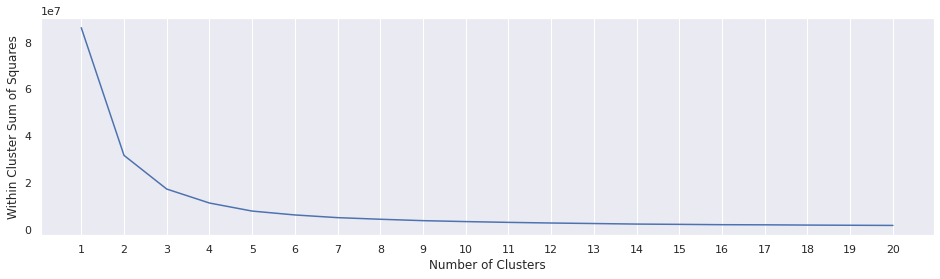

In [ ]:
from sklearn.cluster import KMeans
min_clust = 1
max_clust = 20
init_algo = 'k-means++'

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 5)
    kmeans.fit(predictors)
    within_ss.append(kmeans.inertia_)

# Angle Plot : Within SS vs Number of Clusters
f = plt.figure(figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
silhouette = []
for n_clusters in range(2,20):
  kmeans = KMeans(n_clusters = n_clusters, random_state = 99)
  cluster_labels = kmeans.fit_predict(predictors)
  centers = kmeans.cluster_centers_
  score = silhouette_score(predictors, cluster_labels)
  silhouette.append(score)
  print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5475039409947059
For n_clusters = 3, silhouette score is 0.49218684590977346
For n_clusters = 4, silhouette score is 0.470394686371969
For n_clusters = 5, silhouette score is 0.4628963942647714
For n_clusters = 6, silhouette score is 0.440654212843105
For n_clusters = 7, silhouette score is 0.41577524527793663
For n_clusters = 8, silhouette score is 0.39530008120368615
For n_clusters = 9, silhouette score is 0.38815450006469426
For n_clusters = 10, silhouette score is 0.36895622103208736
For n_clusters = 11, silhouette score is 0.35921008598490817
For n_clusters = 12, silhouette score is 0.3593786515310193
For n_clusters = 13, silhouette score is 0.33386566730033473
For n_clusters = 14, silhouette score is 0.33176294724517325
For n_clusters = 15, silhouette score is 0.3257250578373936
For n_clusters = 16, silhouette score is 0.30673344331090463
For n_clusters = 17, silhouette score is 0.2877451337850706
For n_clusters = 18, silhouette score is 

Text(0.5, 0.98, 'identifying Optimal Cluster Number ')

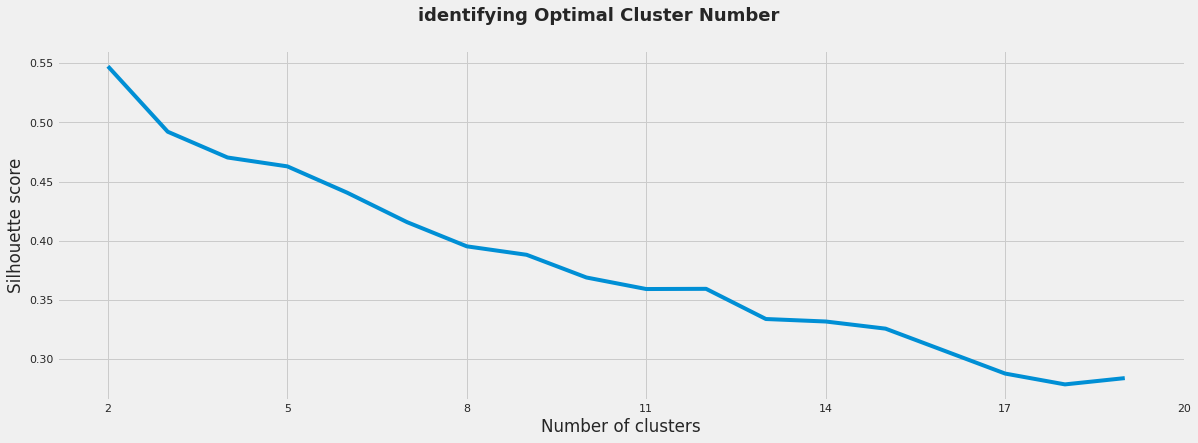

In [ ]:
plt.style.use('fivethirtyeight')
silhouette_fig, ax = plt.subplots(figsize = (18, 6))
ax.plot(range(2,20), silhouette)
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Silhouette score")
ax.set_xticks(np.arange(2,21,3.0))
silhouette_fig.suptitle("identifying Optimal Cluster Number ", weight = "bold", size = 18)

In [ ]:
silhouette_diff = []
for i in range(1,len(silhouette)):
  improvement = 1 - ((1 - silhouette[i]) / (1 - silhouette[i - 1]))
  silhouette_diff.append(improvement)
  print("For n_cluster = {}, percent improvement = {}".format(i + 2, improvement))


For n_cluster = 3, percent improvement = -0.12224878865582611
For n_cluster = 4, percent improvement = -0.042913735814595455
For n_cluster = 5, percent improvement = -0.014158264492912576
For n_cluster = 6, percent improvement = -0.04141134258672441
For n_cluster = 7, percent improvement = -0.044478689455454745
For n_cluster = 8, percent improvement = -0.03504672458460134
For n_cluster = 9, percent improvement = -0.011816739041764057
For n_cluster = 10, percent improvement = -0.03137765830530226
For n_cluster = 11, percent improvement = -0.015444467360282488
For n_cluster = 12, percent improvement = 0.0002630589877031797
For n_cluster = 13, percent improvement = -0.03982537311886025
For n_cluster = 14, percent improvement = -0.0031566006313465955
For n_cluster = 15, percent improvement = -0.009035550158268402
For n_cluster = 16, percent improvement = -0.028165979986705558
For n_cluster = 17, percent improvement = -0.02738962285519486
For n_cluster = 18, percent improvement = -0.0128442

Text(0.5, 0.98, 'identifying Optimal Cluster Number ')

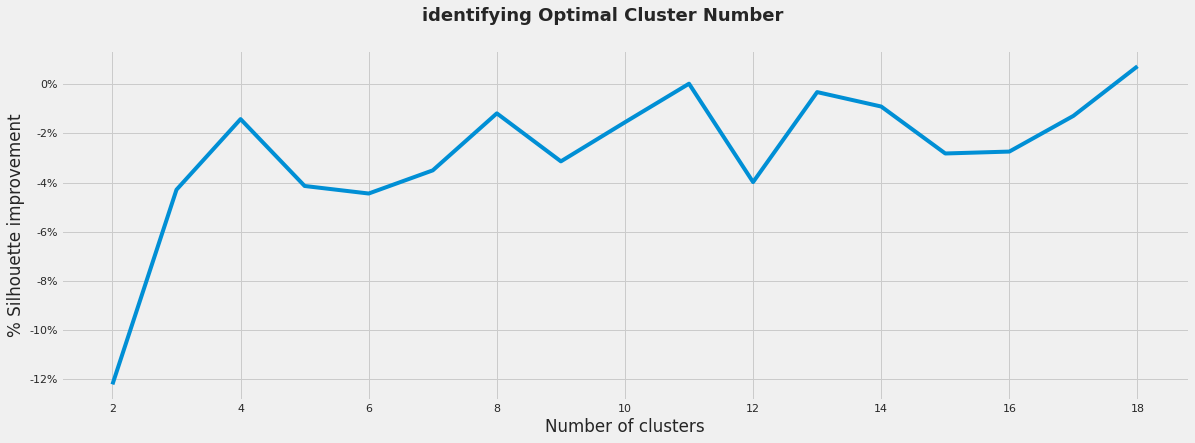

In [ ]:
plt.style.use('fivethirtyeight')
silhouette_imp_fig, ax = plt.subplots(figsize = (18,6))
ax.plot(range(2,19), silhouette_diff)
ax.set_xlabel("Number of clusters")
ax.set_ylabel("% Silhouette improvement")
ax.set_xticks(np.arange(2,19,2.0))
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

silhouette_imp_fig.suptitle("identifying Optimal Cluster Number ", weight = "bold", size = 18)

### **Insights + running the clustering algorithm**

We can see a sharp imporvement in silhouette scores when the number of clusters goes to four, and the sum of squares is also reasonably low with 4. Four also gives us a nice number to work with when making sense of the clusters. So let's choose 4 and perform the clustering. 

In [ ]:
from sklearn.cluster import KMeans

# Set "optimal" Clustering Parameters
num_clust = 4
init_algo = 'k-means++'

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust,         
               init = init_algo,
               n_init = 20)                 

# Fit the Clustering Model on the Data
kmeans.fit(predictors)

KMeans(n_clusters=4, n_init=20)

Features 	HomePossession 	HomeTouches 	HomePasses 	HomeTackles 	HomeClearances 	HomeOffsides 	HomeShots HomeShotsOnTarget

Cluster 0:	18.23	23.29	2.27	16.04	59.04	739.0	530.03	
Cluster 1:	18.91	27.71	2.19	13.72	49.97	625.18	415.11	
Cluster 2:	16.47	19.06	2.29	17.27	68.15	875.85	677.23	
Cluster 3:	19.0	31.64	2.37	12.1	39.02	511.29	307.65	

Within Cluster Sum of Squares : 11381375.231152665



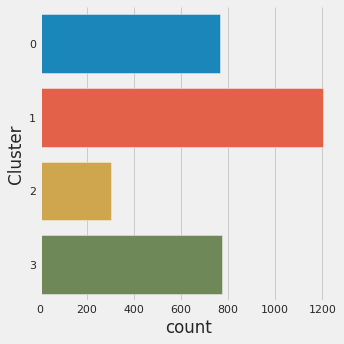

In [ ]:
print("Features", "\tHomePossession", "\tHomeTouches", "\tHomePasses", "\tHomeTackles", "\tHomeClearances", "\tHomeOffsides", "\tHomeShots", "HomeShotsOnTarget")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(predictors)

# Append Labels to the Data
clustering_data_labeled = predictors.copy()
clustering_data_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels

sb.catplot(y = "Cluster", data = clustering_data_labeled, kind = "count")

# Making sense of the clusters

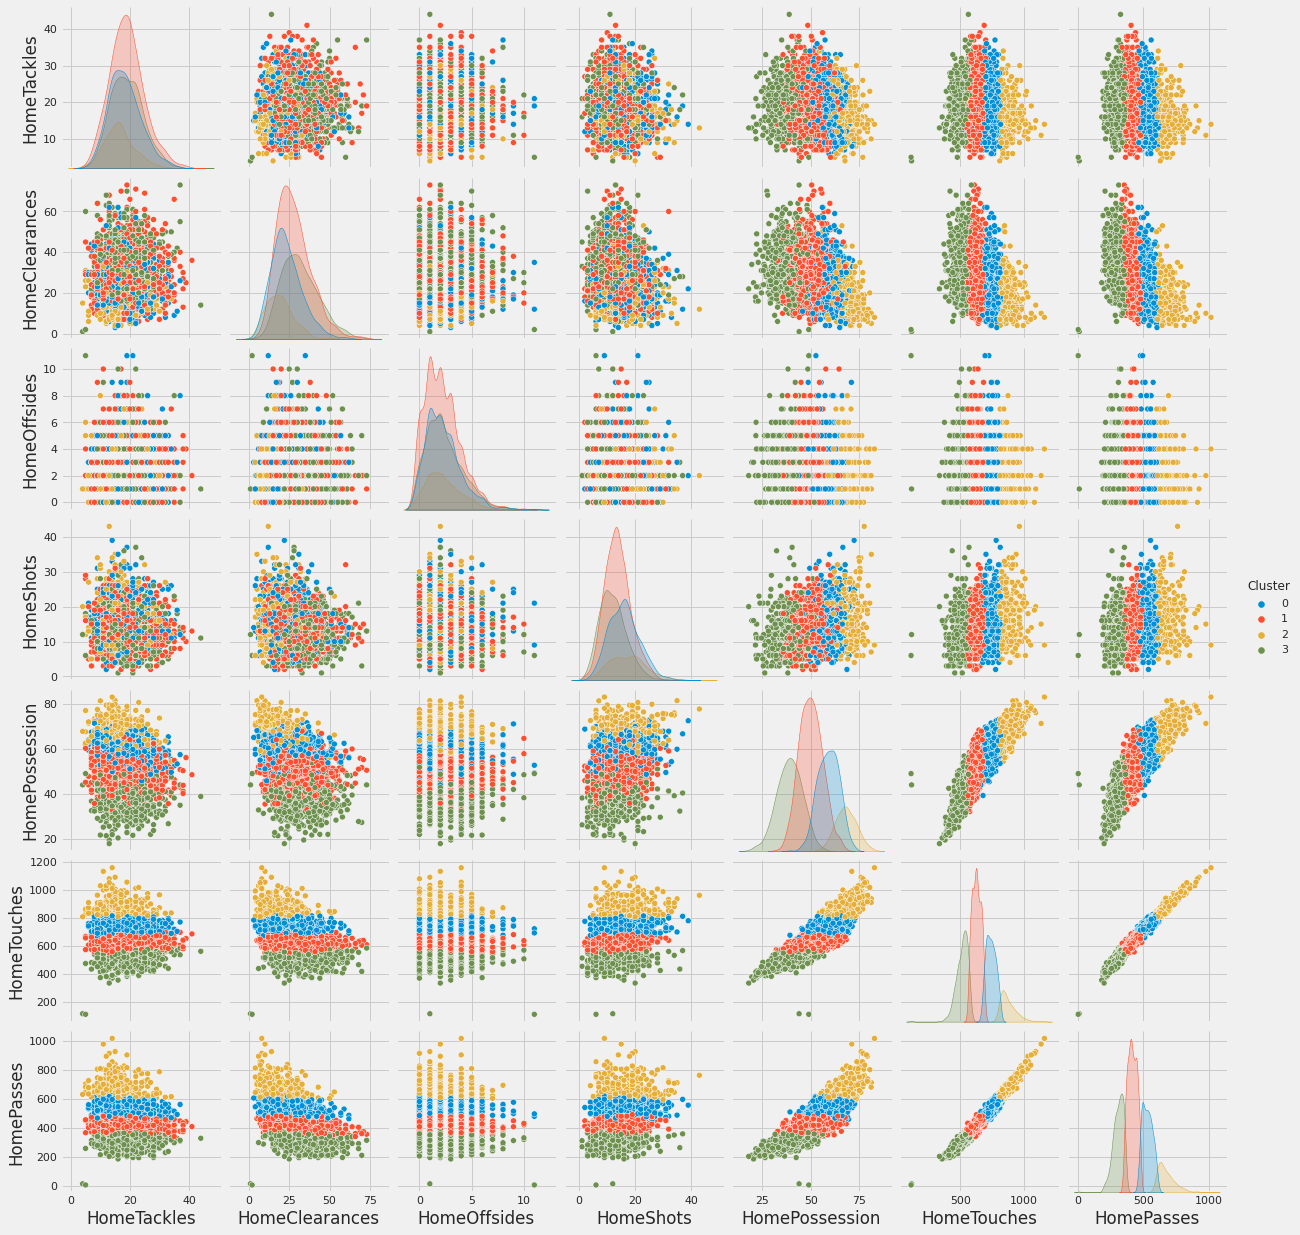

In [ ]:
sb.pairplot(clustering_data_labeled, vars = predictors.columns.values, hue = "Cluster")

In [ ]:
clustering_data_labeled["HomeShotsOnTarget"] = final_data["HomeShotsOnTarget"]
clustering_data_labeled["HomeGoals"] = final_data["HomeGoals"]
clustering_data_labeled["HomeShots"] = final_data["HomeShots"]
cluster_data = pd.DataFrame(clustering_data_labeled.groupby(by = "Cluster").mean())
final_data["Cluster"] = labels

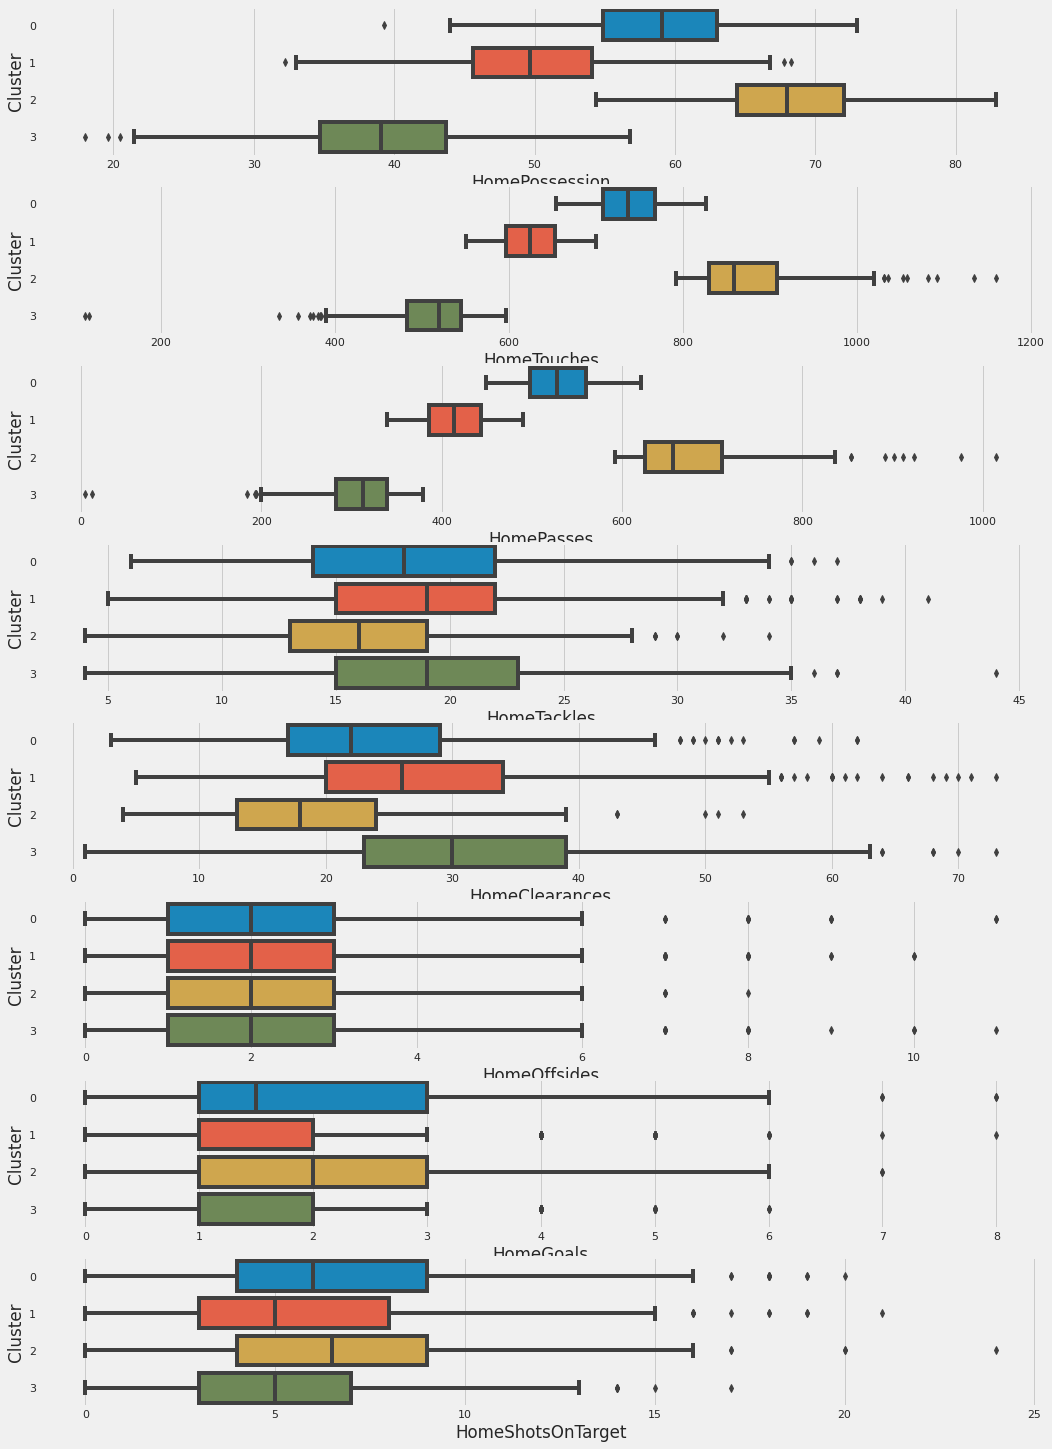

In [ ]:
f, axes = plt.subplots(8, 1, figsize=(16,24))
sb.boxplot(x = 'HomePossession', y = 'Cluster', data = clustering_data_labeled, ax = axes[0])
sb.boxplot(x = 'HomeTouches', y = 'Cluster', data = clustering_data_labeled, ax = axes[1])
sb.boxplot(x = 'HomePasses', y = 'Cluster', data = clustering_data_labeled, ax = axes[2])
sb.boxplot(x = 'HomeTackles', y = 'Cluster', data = clustering_data_labeled, ax = axes[3])
sb.boxplot(x = 'HomeClearances', y = 'Cluster', data = clustering_data_labeled, ax = axes[4])
sb.boxplot(x = 'HomeOffsides', y = 'Cluster', data = clustering_data_labeled, ax = axes[5])
sb.boxplot(x = 'HomeGoals', y = 'Cluster', data = clustering_data_labeled, ax = axes[6])


Hmm... it seems that our algorithm decided to cluster the data mostly based on **passes, possession, and touches**. Cluster 2 (yellow color) seems to have the highest possession, highest touches and highest passes. Cluster 0 (blue) seems to have the next highest for all 3 of these metrics, followed by Cluster 1 (red), and finally, Cluster 3 (green).

Are some of these playstyles more successful than others? Lets look at the average number of goals each cluster has scored per game 

In [ ]:
for i in range(0,num_clust):
    print(f"Cluster {i} has scored " + str(clustering_data_labeled.loc[clustering_data_labeled["Cluster"] == i]["HomeGoals"].mean()) + " per game")


Cluster 0 has scored 1.725130890052356 per game
Cluster 1 has scored 1.4334442595673877 per game
Cluster 2 has scored 2.0364238410596025 per game
Cluster 3 has scored 1.3873056994818653 per game


### **Insights**

Clearly, Cluster 2, with the highest possession, passing and touches, scored by far the most goals, with nearly 2 per game. 
This pattern follows for the rest - the lower these 3 variables are, the lower the number of goals scored per game.  

From this analysis, we can clearly see that **teams should choose to maximise possession, passing and touches in order to likely score more goals** throughout the game.

However, is this always the case? There have clearly been many famous wins where the winning team had much lower possession. We know that some teams, like Mourinho's Chelsea in 2013/14, willingly chose to give up possession to the opposition as a playstyle. This resulted in their famous 2-0 win over Liverpool which lost Liverpool the title that season.

So, should teams ever have a reason to NOT maximise these variables? Let's do some feature engineering to find out.

# Model 4: Feature engineering with simple linear regression

### Finding the feature

The goal of this feature engineering is to **find a 'helpful' variable that actually *decreases* with possession, passing and touches**

From my domain knowledge, I know that teams that play with more passes, possession and touches may end up taking poorer quality shots (meaning, the shots have a lower chance of being a goal), whereas teams with lower possession have greater counter-attack opportunities, and thus their shots have higher chance of being a goal.

Here are some nice counterattack goals: https://youtu.be/ZQX_fOxvd28

One can see that these shots have much higher chance of goal due to the opposition defence needing to chase back. I shall this "chance of goal per shot" variable **"Shot Quality"**. 

We can calculate this by using **bi-variate linear regression** to predict the regular number of goals we expect a team to score given their shots on target, and we calculate the difference in shots on target.

In other words, 

<code>shot quality = (goals actually scored) - (goals predicted by bi-var linreg based on shots taken)</code>
<br>

Let's calculate this!



#### **Predictor: ShotsOnTarget**
#### **Response: Goals Scored**


In [ ]:

from sklearn.linear_model import LinearRegression

clusters = [final_data.loc[final_data["Cluster"] == x] for x in range(0,4)]

linreg = LinearRegression()         # create the linear regression object
linreg.fit(pd.DataFrame(final_data["HomeShotsOnTarget"]), pd.DataFrame(final_data["HomeGoals"]))       # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', float(linreg.intercept_))
print('Coefficients of Regression \t: a = ', float(linreg.coef_))
print()
coef = float(linreg.coef_)
intercept = float(linreg.intercept_)

def model(x):
    return coef * x + intercept

final_data["ShotQuality"] = final_data["HomeGoals"] - final_data["HomeShotsOnTarget"].apply(model)
    # Print the Coefficients against Predictors


Intercept of Regression 	: b =  0.5510652009131358
Coefficients of Regression 	: a =  0.168568371035355



In [ ]:
for i in range(0,num_clust):
    print(f"Shot quality of cluster {i} (times 100) :\t", final_data.loc[final_data["Cluster"] == i]["ShotQuality"].mean()*100)

Shot quality of cluster 0 (times 100) :	 6.778059441242723
Shot quality of cluster 1 (times 100) :	 -11.009877979600349
Shot quality of cluster 2 (times 100) :	 28.919301389227574
Shot quality of cluster 3 (times 100) :	 -0.8784884730264999


### **Insights**

It seems that we have reached the opposite to our hypothesis above - as cluster 2 has a much higher shot quality (28.9) than the rest (next highest is cluster 0 with 6.78), it seems that teams who play with higher possession actually take much better shots as well. 

We are surprised to see this, but it could just be the case that these teams have superior players overall, who are just capable of taking much better shots than the rest of the league.

**Thus, our recommendation from our clustering algorithm remains - one should aim to maximise passing, possession, and touches as far as possible to win football matches**

# Conclusion

Given the data that we have is very limited, we believe that there is scope for much more analysis. In particular, we would be interested to know *how* a team can maximise the above three key metrics. 

We hope the above analysis was interesting. Thank you!
